In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

In [8]:
#keep ourselves dry
def runAlgs():
    #mean shift 
    from sklearn.cluster import MeanShift, estimate_bandwidth

    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))
    print("Mean Shift")
    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data :')
    print(pd.crosstab(y_train,labels))
    print("----------------------------------------")
    #Spectral
    from sklearn.cluster import SpectralClustering

    # We know we're looking for three clusters.
    n_clusters=3

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)
    print("Spectral")
    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    print("----------------------------------------")
    print("Affinity")
    #Affinity
    from sklearn.cluster import AffinityPropagation
    from sklearn import metrics

    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))
    from itertools import cycle

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

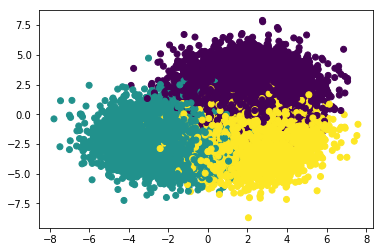

Mean Shift
Number of estimated clusters: 2


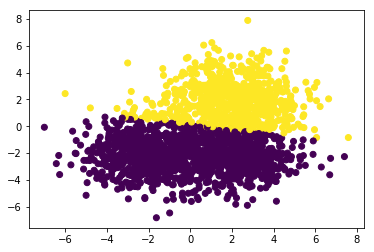

Comparing the assigned categories to the ones in the data :
col_0    0    1
row_0          
0       52  615
1      630   33
2      591   79
----------------------------------------
Spectral


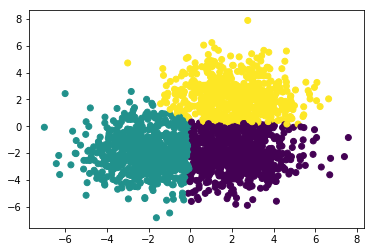

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       75   23  569
1       57  600    6
2      577   55   38
----------------------------------------
Affinity
Estimated number of clusters: 120


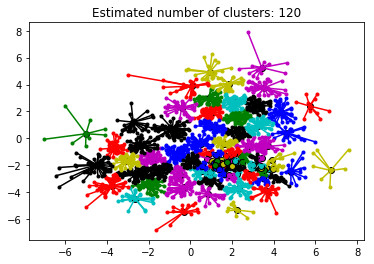

In [9]:
#blob 1
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 20,000 rows worth of data with 3 features representing three
# clusters, each having a standard deviation of 1.5.
X, y = make_blobs(
    n_samples=20000,
    centers=centers,
    cluster_std=1.5,
    n_features=3,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#----------------------------

runAlgs()

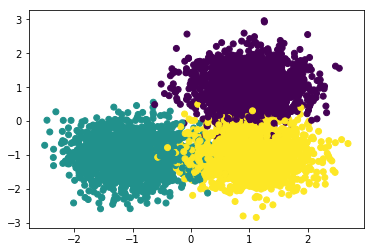

Mean Shift
Number of estimated clusters: 3


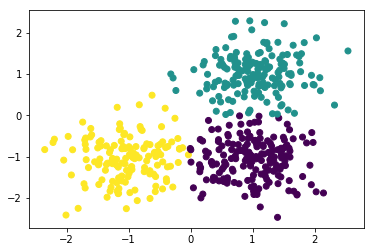

Comparing the assigned categories to the ones in the data :
col_0    0    1    2
row_0               
0        3  165    1
1        6    0  141
2      175    6    3
----------------------------------------
Spectral


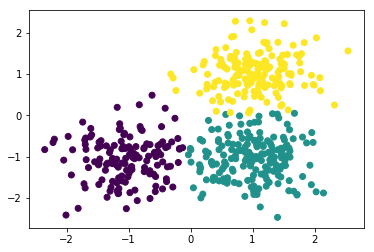

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        1    3  165
1      141    6    0
2        2  180    2
----------------------------------------
Affinity
Estimated number of clusters: 19


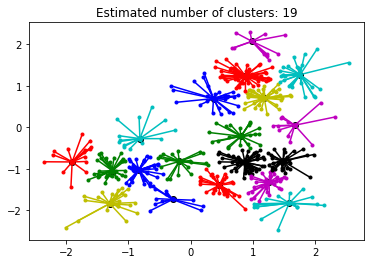

In [10]:
#blob 2
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1]]

# Make 5 rows worth of data with 2 features representing three
# clusters, each having a standard deviation of .5.
X, y = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=.5,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#----------------------------

runAlgs()

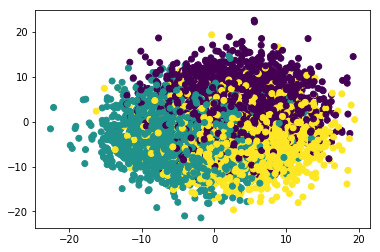

Mean Shift
Number of estimated clusters: 2


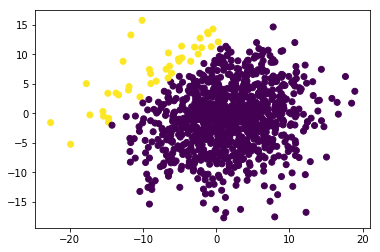

Comparing the assigned categories to the ones in the data :
col_0    0   1
row_0         
0      345  17
1      300  20
2      315   3
----------------------------------------
Spectral


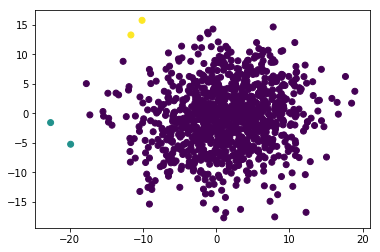

Comparing the assigned categories to the ones in the data:
col_0    0  1  2
row_0           
0      360  0  2
1      318  2  0
2      318  0  0
----------------------------------------
Affinity
Estimated number of clusters: 39


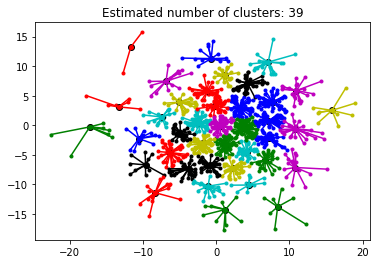

In [13]:
#blob 3
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3]]

# Make 5 rows worth of data with 2 features representing three
# clusters, each having a standard deviation of .5.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=5,
    n_features=5,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#----------------------------

runAlgs()

In [ ]:
#With the first and third blobs, mean shift produced only 2 clusters. blob 2 produced 3. blob 2 and 3 also had a lot less clusters
#than 1 with the affinity. 

#It seems like with less samples, you get some better clusters as we can see with the mean shift in blob 2.

#blob 1 and 3 also have dirtier clusters while blob 2 has more distinct ones